In [277]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


    

In [278]:
#load dataset

df = pd.read_csv(r'C:\Users\Public\Documents\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [279]:
#clean data
### - missing values
### - standardize cats in region
### - standardize sex
### - change smoker to boolean
### - standardize charges data type(float)

df1 = df.dropna()
df1['region'] = df1['region'].str.lower()
FEMALE = 'female'
MALE = 'male'
sex_map={'F':FEMALE, 'woman':FEMALE, 'man':MALE, 'M':MALE}
df1['sex'] = df1['sex'].replace(sex_map)
df1['smoker'] = (df1['smoker']=='yes')
df1['charges'] = df1['charges'].str.strip('$').astype('float64')
df1['children'] = df1['children'].abs()


df1.info()

df1=df1.dropna()

df1.info()










<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   float64
 1   sex       1207 non-null   object 
 2   bmi       1207 non-null   float64
 3   children  1207 non-null   float64
 4   smoker    1207 non-null   bool   
 5   region    1207 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), objec

C:\Users\caspe\AppData\Local\Temp\ipykernel_9900\2619527573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region'] = df1['region'].str.lower()
C:\Users\caspe\AppData\Local\Temp\ipykernel_9900\2619527573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = df1['sex'].replace(sex_map)
C:\Users\caspe\AppData\Local\Temp\ipykernel_9900\2619527573.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

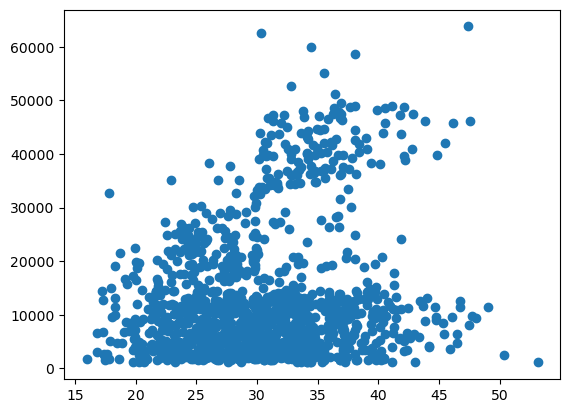

In [280]:
#create scatter plots

import matplotlib.pyplot as plt

plt.scatter(df1['bmi'],     df1['charges'])


In [281]:
#prepare data for model


df_data = pd.get_dummies(df1, columns=['region'], prefix='region')
df_data = df_data.drop(columns=['region_southwest'])
cols_to_convert = ['region_northeast', 'region_northwest', 'region_southeast']
df_data[cols_to_convert] = df_data[cols_to_convert].astype('int8')

df_data['smoker'] = df_data['smoker'].astype('int8')
df_data['is male'] = (df_data['sex']=='MALE').astype('int8')
df_data=df_data.drop(columns=['sex'])


df_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int8   
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   int8   
 6   region_northwest  1207 non-null   int8   
 7   region_southeast  1207 non-null   int8   
 8   is male           1207 non-null   int8   
dtypes: float64(4), int8(5)
memory usage: 53.0 KB


In [282]:
#fit linear regression model to data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge

X = df_data.drop(columns=['charges'])
y = df_data['charges']

#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create and train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
model1 = KernelRidge(alpha=1, kernel='rbf')
model1.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)

#calculate r2 score
r2 = r2_score(y_test,y_pred)
KR  = r2_score(y_test,y_pred1)

#print result
print(f'r2 regression is {r2}') 
print(f'r2 KernelRidge regression is {KR}')

#use linear regression as far better r2 score


r2 regression is 0.6662123191894117
r2 KernelRidge regression is 0.2707193591040171


In [283]:
#create function to preprocess validated dataset

def preprocess_df(df1):
    df_data = pd.get_dummies(df1, columns=['region'], prefix='region')
    df_data = df_data.drop(columns=['region_southwest'])
    cols_to_convert = ['region_northeast', 'region_northwest', 'region_southeast']
    df_data[cols_to_convert] = df_data[cols_to_convert].astype('int8')
    
    df_data['smoker'] = (df_data['smoker']=='yes')
    df_data['smoker'] = df_data['smoker'].astype('int8')
    df_data['is male'] = (df_data['sex']=='MALE').astype('int8')
    df_data=df_data.drop(columns=['sex'])

    return df_data

In [284]:
#check how model performs on validated dataset
#we are using model=LinearRegression because it gave best results earlier

val_df = pd.read_csv(r"C:\Users\Public\Documents\validation_dataset.csv")
input_df1 = preprocess_df(val_df)
pred = model.predict(input_df1)

val_df['predicted charges'] = pred
val_df.to_csv(r"C:\Users\Public\Documents\predicted_charges.csv", index=False)